# librerias

In [129]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.3.1'

# data

In [130]:
volumen = 0.8
sesgo = 0.2

inicio = 0
final = 1
step = 0.025
X = torch.arange(inicio, final, step).unsqueeze(1)
y = volumen * X + sesgo

In [131]:
train_division = int(0.7*len(X))
X_ent, y_ent = X[:train_division], y[:train_division]
X_prueba, y_prueba = X[train_division:], y[train_division:]

In [132]:
predictions = None

def plot_predictions(X_ent, y_ent, X_prueba, y_prueba, predictions):
    plt.figure(figsize=(12, 6))
    plt.scatter(X_ent, y_ent, c='blue', label='Entrenamiento')
    plt.scatter(X_prueba, y_prueba, c='red', label='Prueba')

In [133]:
class RegresionLineal(nn.Module):
    def __init__(self):
        super().__init__()
        self.volumen = nn.Parameter(torch.rand(1, dtype=torch.float), requires_grad=True)
        self.sesgo = nn.Parameter(torch.rand(1, dtype=torch.float), requires_grad=True)

    def forward(self, X):
        return self.volumen * X + self.sesgo
    
torch.manual_seed(42)
model_1 = RegresionLineal()

In [134]:
with torch.inference_mode():
    y_predc = model_1(X_ent)

In [135]:
fn_perdida = torch.nn.L1Loss()
optimizador = torch.optim.SGD(model_1.parameters(), lr=0.01)

Epoca: 0, Perdida entrenamiento: 0.7427697777748108, Perdida prueba: 0.7710778713226318
Epoca: 10, Perdida entrenamiento: 0.6313793063163757, Perdida prueba: 0.6428124308586121
Epoca: 20, Perdida entrenamiento: 0.5199888348579407, Perdida prueba: 0.5145469903945923
Epoca: 30, Perdida entrenamiento: 0.4085983335971832, Perdida prueba: 0.38628149032592773
Epoca: 40, Perdida entrenamiento: 0.2972078025341034, Perdida prueba: 0.25801602005958557
Epoca: 50, Perdida entrenamiento: 0.18581728637218475, Perdida prueba: 0.1297505497932434
Epoca: 60, Perdida entrenamiento: 0.07442677766084671, Perdida prueba: 0.0092703802511096
Epoca: 70, Perdida entrenamiento: 0.023781921714544296, Perdida prueba: 0.05926141142845154
Epoca: 80, Perdida entrenamiento: 0.02081485278904438, Perdida prueba: 0.055718932300806046
Epoca: 90, Perdida entrenamiento: 0.018068155273795128, Perdida prueba: 0.04937559366226196
Epoca: 100, Perdida entrenamiento: 0.015334981493651867, Perdida prueba: 0.042108580470085144
Epoc

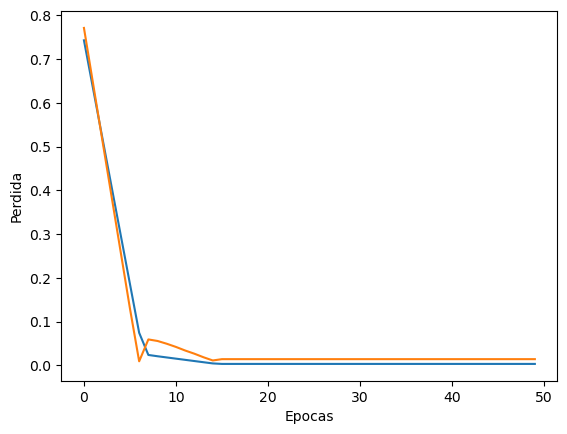

In [136]:
torch.manual_seed(42)

epocas = 500

entrenamiento_loss = []
test_loss = []

for epoca in range(epocas):
    model_1.train()
    y_predc = model_1(X_ent)
    perdida = fn_perdida(y_predc, y_ent)
    optimizador.zero_grad()
    perdida.backward()
    optimizador.step()

    model_1.eval()

    with torch.inference_mode():
        prueba_predc = model_1(X_prueba)
        prueba_perd = fn_perdida(prueba_predc, y_prueba)
        
        if epoca % 10 == 0:
            entrenamiento_loss.append(perdida.detach().numpy())
            test_loss.append(prueba_perd.detach().numpy())
            print(f'Epoca: {epoca}, Perdida entrenamiento: {perdida}, Perdida prueba: {prueba_perd}')

plt.plot(entrenamiento_loss, label='Entrenamiento')
plt.plot(test_loss, label='Prueba')
plt.xlabel('Epocas')
plt.ylabel('Perdida')
plt.show()

In [137]:
model_1.eval()
with torch.inference_mode():
    model_1 = model_1.to(device='cuda')
    X_prueba = X_prueba.to(device='cuda')
    predictions = model_1(X_prueba)

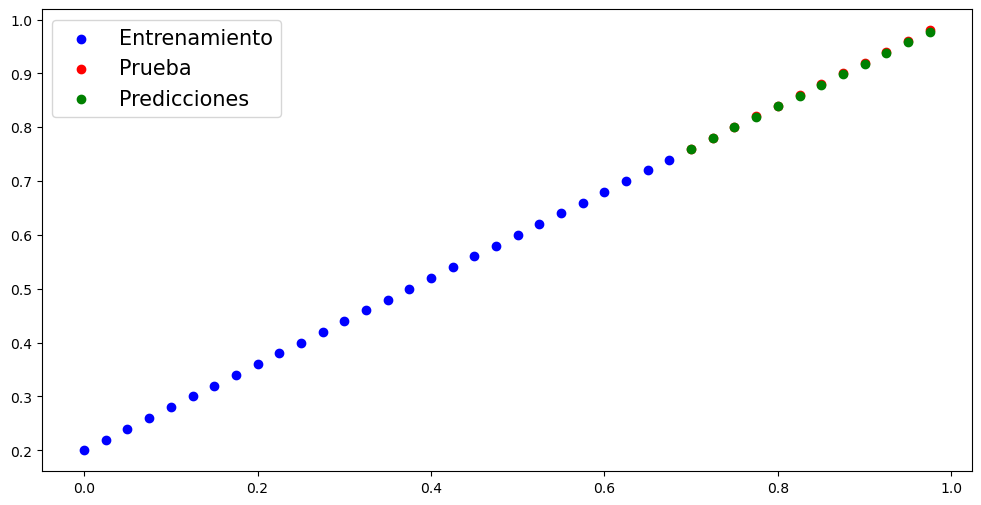

In [138]:
# Asegúrate de que X_prueba y y_prueba son tensores de PyTorch
# y están en la GPU antes de intentar moverlos al CPU y convertirlos a NumPy.

X_prueba_cpu = X_prueba.cpu().numpy()  # Mueve X_prueba a CPU y convierte a NumPy
y_prueba_cpu = y_prueba.cpu().numpy()  # Mueve y_prueba a CPU y convierte a NumPy

plt.figure(figsize=(12, 6))
plt.scatter(X_ent, y_ent, c='blue', label='Entrenamiento')
plt.scatter(X_prueba_cpu, y_prueba_cpu, c='red', label='Prueba')

if predictions is not None:
    predictions_cpu = predictions.cpu().numpy()  # Mueve predictions a CPU y convierte a NumPy
    plt.scatter(X_prueba_cpu, predictions_cpu, c='green', label='Predicciones')

plt.legend(prop={'size': 15})
plt.show()